<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True, dtype=str)

In [2]:
yelp.head()

business_id cool                 date funny  \
0  nDuEqIyRc8YKS1q1fX0CZg    1  2015-03-31 16:50:30     0   
1  eMYeEapscbKNqUDCx705hg    0  2015-12-16 05:31:03     0   
2  6Q7-wkCPc1KF75jZLOTcMw    1  2010-06-20 19:14:48     1   
3  k3zrItO4l9hwfLRwHBDc9w    3  2010-07-13 00:33:45     4   
4  6hpfRwGlOzbNv7k5eP9rsQ    1  2018-06-30 02:30:01     0   

                review_id stars  \
0  eZs2tpEJtXPwawvHnHZIgQ     1   
1  DoQDWJsNbU0KL1O29l_Xug     4   
2  DDOdGU7zh56yQHmUnL1idQ     3   
3  LfTMUWnfGFMOfOIyJcwLVA     1   
4  zJSUdI7bJ8PNJAg4lnl_Gg     4   

                                                text useful  \
0  BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...     10   
1  Came here for lunch Togo. Service was quick. S...      0   
2  I've been to Vegas dozens of times and had nev...      2   
3  We went here on a night where they closed off ...      5   
4  3.5 to 4 stars\n\nNot bad for the price, $12.9...      5   

                  user_id  
0  n1LM36qNg4rqGXIcvVXv8w  
1  5CgjjDAic2-FAvCtiHpytA  
2  BdV-cf3LScmb8kZ7iiBcMA  
3  cZZnBqh4gAEy4CdNvJailQ  
4  n9QO4ClYAS7h9fpQwa5bhA

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

nlp = spacy.load("en_core_web_lg")

[nltk_data] Downloading package punkt to /home/seek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/seek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [5]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [6]:
yelp_tokens = yelp['tokens']

yelp_tokens.head(20)

0     [beware, fake, fake, fake, small, business, lo...
1     [came, lunch, togo, service, quick, staff, fri...
2     [ve, vegas, dozens, times, stepped, foot, circ...
3     [went, night, closed, street, party, best, act...
4     [stars, bad, price, lunch, seniors, pay, eatin...
5     [tasty, fast, casual, latin, street, food, men...
6     [absolutely, amazing, incredible, production, ...
7     [came, pho, enjoyed, got, pm, busy, got, serve...
8     [absolutely, unique, experience, nail, shop, f...
9     [wow, walked, sat, bar, minutes, bartenders, w...
10    [popped, dinner, yesterday, reservation, despi...
11    [thw, worst, stay, ended, paying, nights, said...
12    [great, friendly, customer, service, quality, ...
13    [food, great, super, busy, server, attentive, ...
14    [talk, getting, ripped, charged, shut, valve, ...
15    [girls, night, tonight, kid, decided, drive, h...
16    [stopped, drinks, flying, charlotte, weeks, ba...
17    [excellent, restaurant, encourage, visitin

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [7]:
data = yelp_tokens

In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
cool           10000 non-null object
date           10000 non-null object
funny          10000 non-null object
review_id      10000 non-null object
stars          10000 non-null object
text           10000 non-null object
useful         10000 non-null object
user_id        10000 non-null object
tokens         10000 non-null object
dtypes: object(10)
memory usage: 781.3+ KB


In [9]:
yelp_tokens = yelp['tokens'].astype(str)

In [10]:
data = yelp_tokens

In [11]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)
#dtm = tfidf.transform(new_data)

# Print word counts

# Get feature names to use as dataframe column headers

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

ability  able  absolute  absolutely   ac  accent  accept  acceptable  \
0      0.0   0.0       0.0         0.0  0.0     0.0     0.0         0.0   
1      0.0   0.0       0.0         0.0  0.0     0.0     0.0         0.0   
2      0.0   0.0       0.0         0.0  0.0     0.0     0.0         0.0   
3      0.0   0.0       0.0         0.0  0.0     0.0     0.0         0.0   
4      0.0   0.0       0.0         0.0  0.0     0.0     0.0         0.0   

   accepted  access  ...  yuck  yuk  yum  yummy  yup  zero  zone  zoo  \
0       0.0     0.0  ...   0.0  0.0  0.0    0.0  0.0   0.0   0.0  0.0   
1       0.0     0.0  ...   0.0  0.0  0.0    0.0  0.0   0.0   0.0  0.0   
2       0.0     0.0  ...   0.0  0.0  0.0    0.0  0.0   0.0   0.0  0.0   
3       0.0     0.0  ...   0.0  0.0  0.0    0.0  0.0   0.0   0.0  0.0   
4       0.0     0.0  ...   0.0  0.0  0.0    0.0  0.0   0.0   0.0  0.0   

   zucchini  était  
0       0.0    0.0  
1       0.0    0.0  
2       0.0    0.0  
3       0.0    0.0  
4       0.0    0.0  

[5 rows x 5000 columns]

In [12]:
# Get Word Counts for each document
dtm.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.08374961, ..., 0.        , 0.        ,
         0.        ]])

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [14]:
dist_df = pd.DataFrame(dist_matrix)

dist_df[0].idxmax(axis=0)

0

In [15]:
dist_df.shape

(10000, 10000)

In [16]:
dist_df[0]

0       1.000000
1       0.000000
2       0.014769
3       0.000000
4       0.000000
5       0.028595
6       0.003441
7       0.005949
8       0.002335
9       0.033934
10      0.008032
11      0.044258
12      0.000000
13      0.000000
14      0.161921
15      0.000000
16      0.003988
17      0.000000
18      0.020421
19      0.020425
20      0.022786
21      0.003015
22      0.070319
23      0.003713
24      0.000000
25      0.012260
26      0.000000
27      0.000000
28      0.000000
29      0.007559
          ...   
9970    0.031191
9971    0.025284
9972    0.000000
9973    0.065152
9974    0.000000
9975    0.002760
9976    0.023955
9977    0.000000
9978    0.000000
9979    0.006521
9980    0.004137
9981    0.000000
9982    0.022165
9983    0.035718
9984    0.005287
9985    0.018542
9986    0.022124
9987    0.000000
9988    0.011291
9989    0.006770
9990    0.000000
9991    0.000000
9992    0.000000
9993    0.013500
9994    0.022723
9995    0.055663
9996    0.000000
9997    0.0000

In [17]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [18]:
# Query Using kneighbors
nn.kneighbors(dtm.todense()[0])

(array([[0.        , 1.        , 1.        , 1.25098799, 1.25476368]]),
 array([[   0, 6204, 6311, 2131, 3276]]))

In [19]:
fake_review = ["""This place is a disaster. DO NOT EVER GO TO THIS PLACE!!!!"""]

In [20]:
new = tfidf.transform(fake_review)

nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.1859987 , 1.19196279, 1.22612331]]),
 array([[6204, 6311, 6338, 5129, 8191]]))

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [21]:
# Import Statements
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Create Pipeline

vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

In [23]:
X = data
y = yelp['stars']

In [24]:
pipe.fit(X, y)

/home/seek/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [25]:
pipe.predict(["""This place is a disaster. DO NOT EVER GO TO THIS PLACE!!!!"""])

array(['1'], dtype='<U1')

In [26]:
# Experiment Management
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

In [28]:
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)

In [29]:
grid_search.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    8.8s finished
/home/seek/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'clf__max_iter': (20, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [30]:
grid_search.best_score_

0.6097

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

  _The topic modeling results for the yelp reviews are very interesting.It appears that the words 'good', 'food', 'like', and 'place' have
  the most coherence. This is based the pyLDAvis visualization. That visualization provides a very good insight to the LDA topic model results._

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [31]:
import os
import warnings
warnings.filterwarnings('ignore')

In [32]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(yelp['tokens'])

In [33]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)

In [34]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [36]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=12
                  )

In [37]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [38]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.141753 -0.023407       1        1  12.916052
12     0.120774 -0.007123       2        1  12.328135
13     0.037357  0.064170       3        1  10.958590
11    -0.163466 -0.024088       4        1   9.901034
1     -0.082503 -0.082080       5        1   8.303608
3     -0.044009  0.115721       6        1   6.777562
5      0.089703  0.021370       7        1   5.973057
14     0.084317 -0.058771       8        1   5.672973
7      0.065936 -0.056521       9        1   5.004326
2     -0.114216  0.031037      10        1   4.894097
6     -0.015940  0.092612      11        1   4.770280
10    -0.103083 -0.053323      12        1   3.570223
8     -0.053920 -0.045886      13        1   3.527553
0      0.062877  0.007376      14        1   3.316967
9     -0.025580  0.018914      15        1   2.085549, topic_info=     Category         Freq        Term        Total  loglift  logprob
133   Default  4993.000000        food  4993.000000  30.0000  30.0000
188   Default  4168.000000       great  4168.000000  29.0000  29.0000
1039  Default  1371.000000     chicken  1371.000000  28.0000  28.0000
94    Default   950.000000        room   950.000000  27.0000  27.0000
42    Default  3687.000000     service  3687.000000  26.0000  26.0000
1137  Default   471.000000   breakfast   471.000000  25.0000  25.0000
702   Default   720.000000       store   720.000000  24.0000  24.0000
682   Default   564.000000       sushi   564.000000  23.0000  23.0000
122   Default  4705.000000       place  4705.000000  22.0000  22.0000
342   Default  1584.000000       order  1584.000000  21.0000  21.0000
992   Default   632.000000      coffee   632.000000  20.0000  20.0000
570   Default  1441.000000  restaurant  1441.000000  19.0000  19.0000
27    Default  1206.000000        said  1206.000000  18.0000  18.0000
37    Default  4684.000000        good  4684.000000  17.0000  17.0000
1509  Default   470.000000       hotel   470.000000  16.0000  16.0000
1667  Default   606.000000         car   606.000000  15.0000  15.0000
374   Default   881.000000       asked   881.000000  14.0000  14.0000
318   Default  1237.000000   delicious  1237.000000  13.0000  13.0000
465   Default   978.000000        told   978.000000  12.0000  12.0000
1029  Default  1541.000000     ordered  1541.000000  11.0000  11.0000
392   Default   914.000000    customer   914.000000  10.0000  10.0000
1736  Default   537.000000      burger   537.000000   9.0000   9.0000
189   Default   407.000000        hair   407.000000   8.0000   8.0000
31    Default  3438.000000        time  3438.000000   7.0000   7.0000
176   Default  1312.000000     amazing  1312.000000   6.0000   6.0000
15    Default  3504.000000        like  3504.000000   5.0000   5.0000
68    Default  2049.000000         got  2049.000000   4.0000   4.0000
996   Default   212.000000        eggs   212.000000   3.0000   3.0000
910   Default   258.000000        pool   258.000000   2.0000   2.0000
638   Default  1654.000000        love  1654.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
634   Topic15    46.756306        home   767.138977   1.0724  -5.2482
2465  Topic15    16.572296        salt   100.686646   2.0659  -6.2854
1667  Topic15    40.665031         car   606.485840   1.1678  -5.3878
15    Topic15    89.735718        like  3504.768066   0.2051  -4.5963
42    Topic15    89.400581     service  3687.640625   0.1505  -4.6000
188   Topic15    92.077599       great  4168.775391   0.0574  -4.5705
187   Topic15    45.843758       going  1165.805908   0.6342  -5.2679
152   Topic15    37.727646       think   879.813721   0.7208  -5.4627
426   Topic15    42.761772        know  1195.346313   0.5396  -5.3375
881   Topic15    41.404541         new  1159.076538   0.5381  -5.3697
37    Topic15    71.900291        good  4684.125977  -0.3065  -4.8179
122   Topic15    70.567459   

In [41]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = yelp['tokens']
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=yelp['tokens'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

/home/seek/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/seek/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/seek/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instea

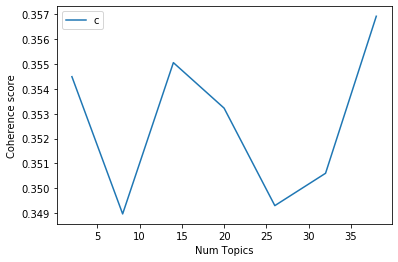

In [43]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)